# 2 Understanding the Data Set

In [1]:
import numpy as np
from ps1_functions import load_json_files
import os
import matplotlib.pyplot as plt
%matplotlib inline

path_swiss_roll_root = os.getcwd().replace('Code','Data')
path_figures = os.getcwd().replace('Code','Figures')
if not os.path.exists(path_figures):
    os.makedirs(path_figures)
swiss_roll_points = load_json_files(os.path.join(path_swiss_roll_root, 'swiss_roll_points.json'))
swiss_roll_labels = load_json_files(os.path.join(path_swiss_roll_root, 'swiss_roll_labels.json'))

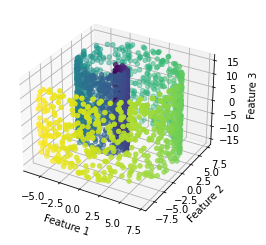

In [2]:
# preprocessing: centering
swiss_roll_points -= np.mean(swiss_roll_points, axis=0)
swiss_roll_labels -= np.mean(swiss_roll_labels, axis=0)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll_points[:,0], swiss_roll_points[:,1], swiss_roll_points[:,2], c=swiss_roll_labels)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
fig.savefig(os.path.join(path_figures,'Section_2.pdf'))
plt.show()

## Question 2.1
Answer: 1) The visualization of the swiss roll dataset looks likes a spinning manifold. 
2) We can also see a color gradients from inside to outside using the label provided. We can see that the datapoints nearby have similar label values.
3) The labels are meaningful to describe the manifold feature including the distance difference. 
4) A good dimensionality reduction technique will be able to better describe the feature when mapping the dataset into lower dimension. The technique needs to be able to perform non-linear mapping.

# 2.1 Visualizing Data with PCA

1. Run PCA on the swiss roll data set, obtaining the principal components, projections, and singular values

In [29]:
def func_PCA(data):
    U, sigValues, T = np.linalg.svd(data, full_matrices=False)
    principal_components = T.T
    projections = U.dot(np.diag(sigValues))

    return principal_components, projections, sigValues

pcs, projs, sigvalues = func_PCA(swiss_roll_points)
print('Principal components:',pcs) # (3,3)
print('Projections:', projs) # (2000,3)
print('Singular values:', sigvalues)

Principal components: [[ 0.01342441 -0.0454883  -0.99887467]
 [-0.02018733  0.99874874 -0.04575387]
 [ 0.99970609  0.02077883  0.01248932]]
Projections: [[  4.01541113  -3.0419295   -6.45378697]
 [-10.40102067   0.58000427  -7.18121979]
 [ 15.13618491  -3.10452446  -6.18886907]
 ...
 [-10.05496844   0.91436147   0.58339848]
 [  1.3144476    7.22479456   0.34384618]
 [ 13.43855012   1.39156608  -0.41830526]]
Singular values: [388.60459679 194.04638291 165.55193519]


2. Plot the swiss roll in two dimensions, using the principal components. You might wish to try different
combinations, since there are few of them (i.e. the 
rst and second components, the first and third
components, the second and third components). Color the points with their corresponding labels.

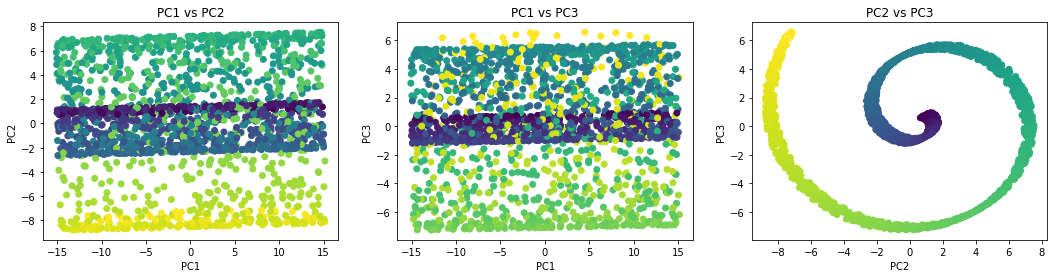

In [31]:
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(131)
ax1.scatter(projs[:,0],projs[:,1],c=swiss_roll_labels)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PC1 vs PC2')

ax2 = fig.add_subplot(132)
ax2.scatter(projs[:,0],projs[:,2],c=swiss_roll_labels)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax2.set_title('PC1 vs PC3')

ax3 = fig.add_subplot(133)
ax3.scatter(projs[:,1],projs[:,2],c=swiss_roll_labels)
ax3.set_xlabel('PC2')
ax3.set_ylabel('PC3')
ax3.set_title('PC2 vs PC3')

fig.savefig(os.path.join(path_figures,'Section_2_1.pdf'))
plt.show()

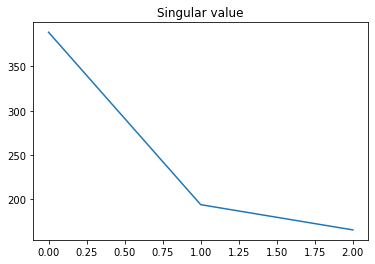

In [5]:
plt.plot(np.arange(sigvalues.shape[0]),sigvalues)
plt.title('Singular value')
plt.savefig(os.path.join(path_figures,'Section_2_1_sigvalue.pdf'))
plt.show()

## Question 2.2
Answer: 1) PCA tries to unroll the dataset but it fails to retains the dataset's properties. The first plot of PC1 vs PC2 tries to separate the dataset using the first and second components but there are many places where the two are mixed together. The PC1 vs PC3 also shows similar result compared with PC1 vs PC2. The PC2 vs PC3 completely fails as it only removes the z-dimension.
2) Because PCA assumes linear relationship, it doesn't work well with the dataset as it is non-linear.
3) By ploting the singular value, we can see that the largest singular value dominates. PCA wants to explain the dataset in one dimension, which is not true.

# 4 Experiment 1: Swiss Roll Dataset
## 4.1 Visualizing Data with Diffusion Maps
1. Construct the diffusion map $\Psi_t$ of the swiss roll data set using euclidean distance, Gaussian kernel with width $\sigma$ = 3.0, and diffusion parameter t = 1.


In [6]:
from ps1_functions import compute_distances, compute_affinity_matrix, diff_map_info, get_diff_map
def func_DiffuseMap(dataset, kernel_type, t, sigma=None, k=None):
    distance_matrix = compute_distances(dataset)
    affinity_matrix = compute_affinity_matrix(distance_matrix, kernel_type, sigma, k)
    diff_vec, diff_eig = diff_map_info(affinity_matrix)
    diff_map = get_diff_map(diff_vec, diff_eig, t)
    return diff_map, diff_vec, diff_eig

diff_map_sigma3, diff_vec_sigma3, diff_eig_sigma3 = func_DiffuseMap(swiss_roll_points, kernel_type='gaussian', sigma=3, t=1)

2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.

3. Plot the eigenvalues $\lambda_i$ of the Markov matrix M

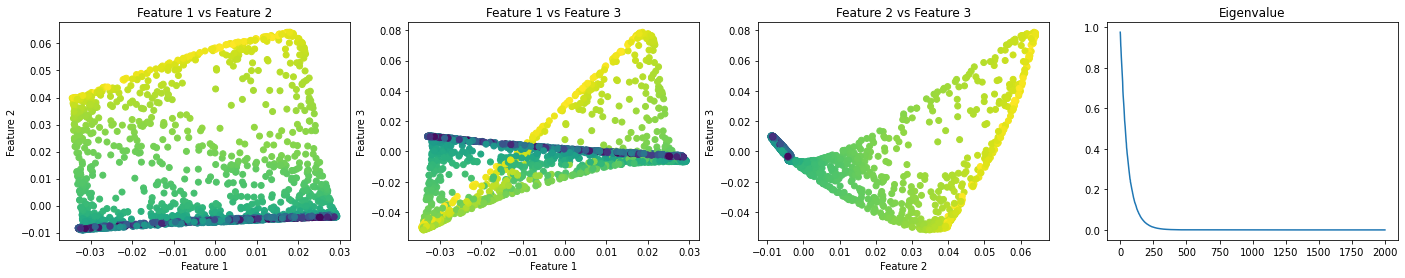

In [7]:
def func_plotDiffuseMapEigenValue(diff_map, diff_eig, swiss_roll_labels):
    fig, axes = plt.subplots(1,4)
    fig.set_size_inches(24,4)
    axes[0].scatter(diff_map[:,0],diff_map[:,1],c=swiss_roll_labels)
    axes[0].set_title('Feature 1 vs Feature 2')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    axes[1].scatter(diff_map[:,0],diff_map[:,2],c=swiss_roll_labels)
    axes[1].set_title('Feature 1 vs Feature 3')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 3')

    axes[2].scatter(diff_map[:,1],diff_map[:,2],c=swiss_roll_labels)
    axes[2].set_title('Feature 2 vs Feature 3')
    axes[2].set_xlabel('Feature 2')
    axes[2].set_ylabel('Feature 3')

    axes[3].plot(np.arange(diff_eig.shape[0]),diff_eig)
    axes[3].set_title('Eigenvalue')
    plt.show()
    return fig

fig = func_plotDiffuseMapEigenValue(diff_map_sigma3, diff_eig_sigma3, swiss_roll_labels)
fig.savefig(os.path.join(path_figures,'Section_4_1_sigma3.pdf'))

4. Repeat for $\sigma=1.0$ and $\sigma=6.0$
    - $\sigma=1$

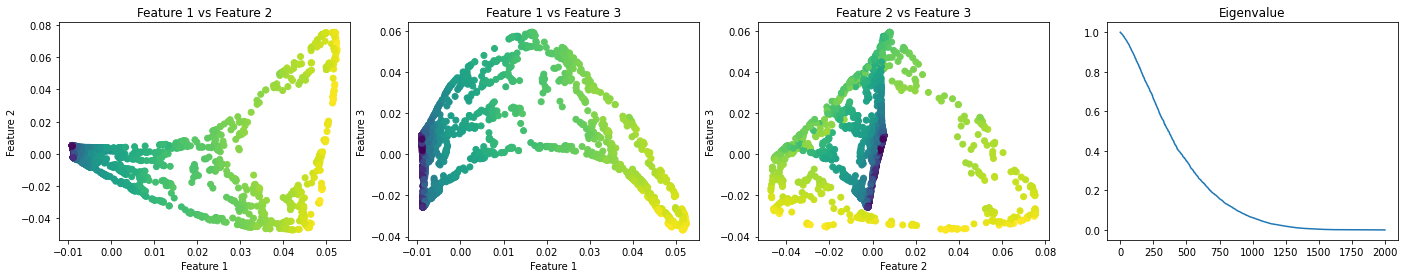

In [8]:
diff_map_sigma1, diff_vec_sigma1, diff_eig_sigma1 = func_DiffuseMap(swiss_roll_points, kernel_type='gaussian', sigma=1, t=1)
fig = func_plotDiffuseMapEigenValue(diff_map_sigma1, diff_eig_sigma1, swiss_roll_labels)
fig.savefig(os.path.join(path_figures,'Section_4_1_sigma_1.pdf'))

$\sigma=6$

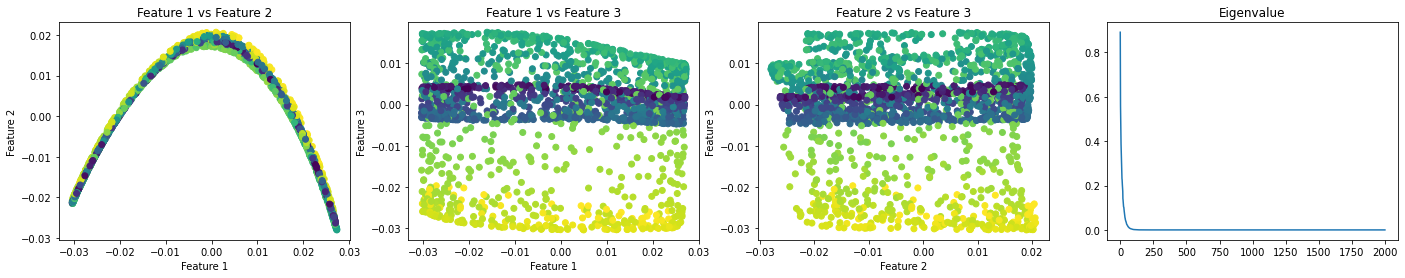

In [9]:
diff_map_sigma6, diff_vec_sigma6, diff_eig_sigma6 = func_DiffuseMap(swiss_roll_points, kernel_type='gaussian', sigma=6, t=1)
fig = func_plotDiffuseMapEigenValue(diff_map_sigma6, diff_eig_sigma6, swiss_roll_labels)
fig.savefig(os.path.join(path_figures,'Section_4_1_sigma6.pdf'))

## Question 4.1
Answer: 1) The diffusion map works better than the PCA as it better unrolls the swiss roll dataset. 
2) The visualization shows the non-linear properties of the swiss roll manifold. The affinity matrix is computed using the kernel function on the distance between points. As the kernel function forms a inner product space
and is non-linear, the diffusion map will be able to reveal significant features in the dataset.
3) When $\sigma$ increases, the distance between neigboring points are viewed less importantly. As points originally far away will be regarded closer when computing the affinity matrix, the number of significant eigenvalues will decrease. As from the figure of $\sigma=6$,
feature 1 vs feature tends to unroll the dataset in 1-dimension. Conversely, when $\sigma$ decreases, the points originally close will be pushed away by the kernel function. The points will only connect with its close neighbors. 
Thus, from figure of $\sigma =1$, it doesn't work as well as when $\sigma=3$.
4) The intrinsic dimensionality can be viewed by looking at the number of significant eigenvalues of M. For instance, n_dim $\approx$ 1 when $\sigma =6$, and n_dim>3 when $\sigma=1$ or $\sigma=3$.

# 5 Understanding the First Eigenvector of the Markov Matrix
1. Construct the affnity matrix of the swiss roll data set using euclidean distance and Gaussian kernel with width $\sigma=1.0$.
2. Compute the largest left eigenvector $\phi_1$ of $M = D^{-1}W$, which may be obtained as $\phi_1 = v_1D^{\frac{1}{2}}$.
3. Plot the swiss roll in 3 dimensions using the original coordinates and color the points using the corresponding values in $\phi_1$.

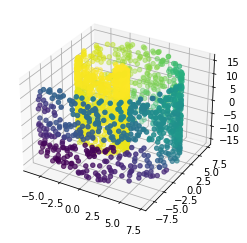

In [10]:
def func_AffinityMatrix(dataset, kernel_type, sigma=None, k=None):
    distance_matrix = compute_distances(dataset)
    affinity_matrix = compute_affinity_matrix(distance_matrix, kernel_type, sigma, k)
    W = affinity_matrix
    row_sum = np.sum(W,axis=1) # axis=1 is row sum
    D = np.diag(row_sum) # D is not distance matrix but the row sum diagonal matrix
    D_half_inv = np.sqrt(np.linalg.inv(D))
    Ms = D_half_inv.dot(W).dot(D_half_inv)
    eigValue, eigVector = np.linalg.eigh(Ms)
    index_sort = np.argsort(-eigValue)
    # sort the eigenvalue to obtain the largest-k components
    eigValue_sorted = eigValue[index_sort]
    eigVector_sorted = eigVector[:, index_sort]
    left_largest_eigVector = eigVector_sorted[:,0].dot(D_half_inv)
    return affinity_matrix, left_largest_eigVector

affinity_sigma1, left_largest_eigVector = func_AffinityMatrix(swiss_roll_points, kernel_type='gaussian', sigma=1)
fig_lle = plt.figure()
ax_lle = fig_lle.add_subplot(projection='3d')
ax_lle.scatter(swiss_roll_points[:,0], swiss_roll_points[:,1], swiss_roll_points[:,2], c=left_largest_eigVector)
fig_lle.savefig(os.path.join(path_figures,'Section_5.pdf'))
plt.show()

## Question 5.1
Answer: As the left largest eigenvector also measures the density. From the figure, the eigenvector labels the density from high such as the points near center and low such as points more far away.

## 5.1 Using an Adaptive Gaussian Kernel
1. Construct the diffusion map $\Psi_{t}$ of the swiss roll data set using euclidean distance, adaptive k-nearest neighbor Gaussian kernel with $k = 5$, and diffusion parameter $t = 1$
2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.
3. Plot the eigenvalues $\lambda_i$ of the Markov matrix $M$

In [11]:
diff_map_k5, diff_vec_k5, diff_eig_k5 = func_DiffuseMap(swiss_roll_points, kernel_type='adaptive', k=5, t=1)

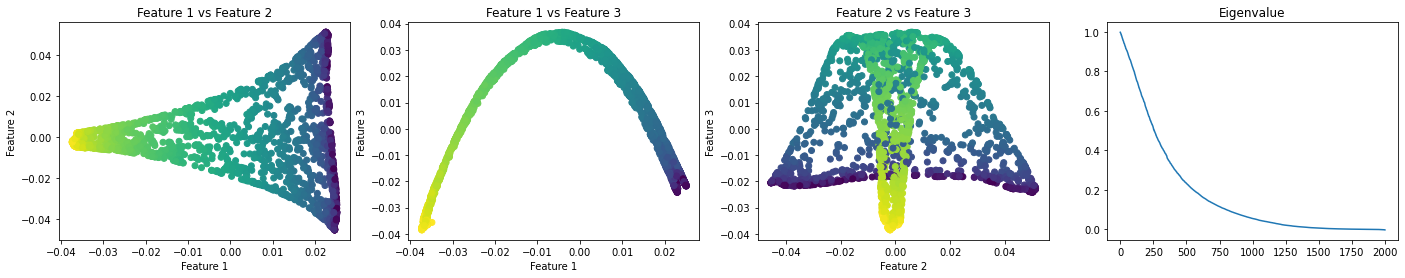

In [12]:
fig = func_plotDiffuseMapEigenValue(diff_map_k5, diff_eig_k5, swiss_roll_labels)
fig.savefig(os.path.join(path_figures,'Section_5_1_k5.pdf'))

4. Repeat for $k=10$.

In [13]:
diff_map_k10, diff_vec_k10, diff_eig_k10 = func_DiffuseMap(swiss_roll_points, kernel_type='adaptive', k=10, t=1)

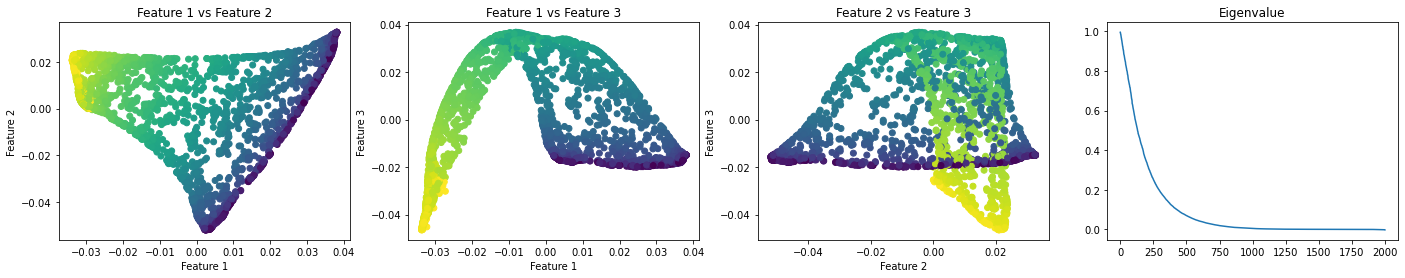

In [14]:
fig = func_plotDiffuseMapEigenValue(diff_map_k10, diff_eig_k10, swiss_roll_labels)
fig.savefig(os.path.join(path_figures,'Section_5_1_k10.pdf'))

## Question 5.2
Answer: 1) The fixed choice of $\sigma$ sets a global bandwidth for the data points. Thus, it might be unsuitable for some cases when data points are too close or too far. Having a adaptive bandwidth will be more helpful.
2) The intrinsic dimensionality of data set of M is greater than 3 from the number of significant eigenvalues.
3) When k is larger, it tends to capture more information. From the feature 1 vs feature 3 plot, k=5 seems to only captures one-dimensional information while k=10 unrolls the dataset better.
4) I will recommend the fixed gaussian kernel function as it has already captured main direction to unroll the dataset. It is also more computationally efficient. 

## 5.2 Changing the Diffusion Parameter t
1. Construct the diffusion map $\Psi_{t}$ of the swiss roll data set using euclidean distance, adaptive k-nearest neighbor Gaussian kernel with k = 10, and diffusion parameter t = 1.
2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.
3. Plot the eigenvalues $\lambda_i$ of the Markov matrix M

In [15]:
def func_plotDiffuseMapEigenValueWithTitle(diff_map, diff_eig, swiss_roll_labels, k, t):
    fig, axes = plt.subplots(1,4)
    fig.set_size_inches(24,4)
    axes[0].scatter(diff_map[:,0],diff_map[:,1],c=swiss_roll_labels)
    axes[0].set_title('Feature 1 vs Feature 2')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    axes[1].scatter(diff_map[:,0],diff_map[:,2],c=swiss_roll_labels)
    axes[1].set_title('Feature 1 vs Feature 3')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 3')

    axes[2].scatter(diff_map[:,1],diff_map[:,2],c=swiss_roll_labels)
    axes[2].set_title('Feature 2 vs Feature 3')
    axes[2].set_xlabel('Feature 2')
    axes[2].set_ylabel('Feature 3')

    axes[3].plot(np.arange(diff_eig.shape[0]),diff_eig**t)
    axes[3].set_title('Eigenvalue')
    plt.suptitle("Diffusion map plot using adaptive Gaussian kernel with k={} and t={}".format(k,t))
    plt.show()
    return fig

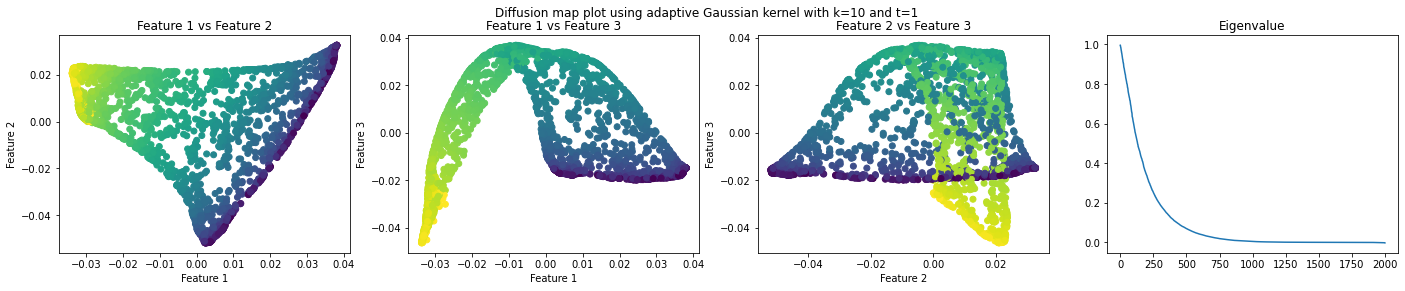

In [16]:
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_k10, diff_eig_k10, swiss_roll_labels, k=10, t=1)
fig.savefig(os.path.join(path_figures,'Section_5_2_t1.pdf'))

4. Repeat for $t=10,20,50$

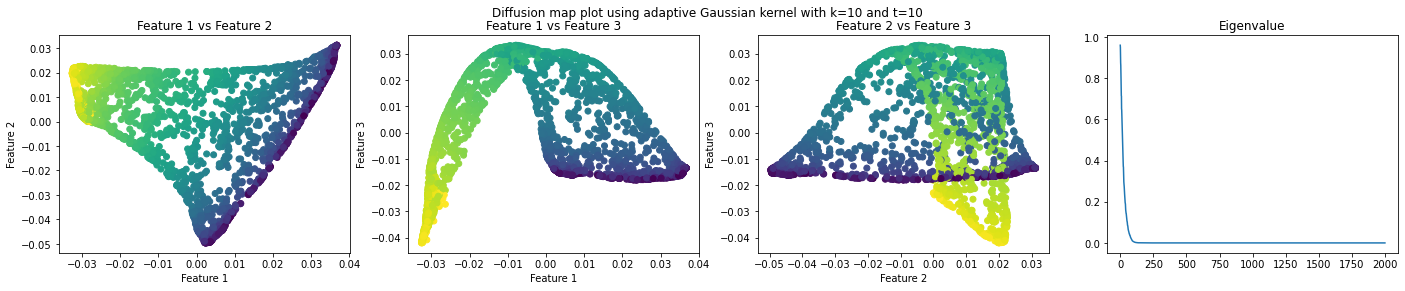

In [17]:
diff_map_k10_t10 = get_diff_map(diff_vec_k10, diff_eig_k10, t=10)
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_k10_t10, diff_eig_k10, swiss_roll_labels, k=10, t=10)
fig.savefig(os.path.join(path_figures,'Section_5_2_t10.pdf'))

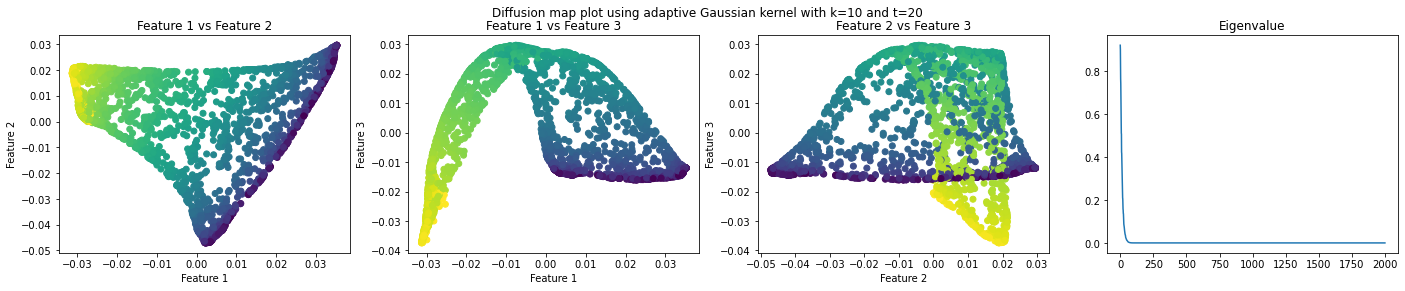

In [18]:
diff_map_k10_t20 = get_diff_map(diff_vec_k10, diff_eig_k10, t=20)
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_k10_t20, diff_eig_k10, swiss_roll_labels, k=10, t=20)
fig.savefig(os.path.join(path_figures,'Section_5_2_t20.pdf'))

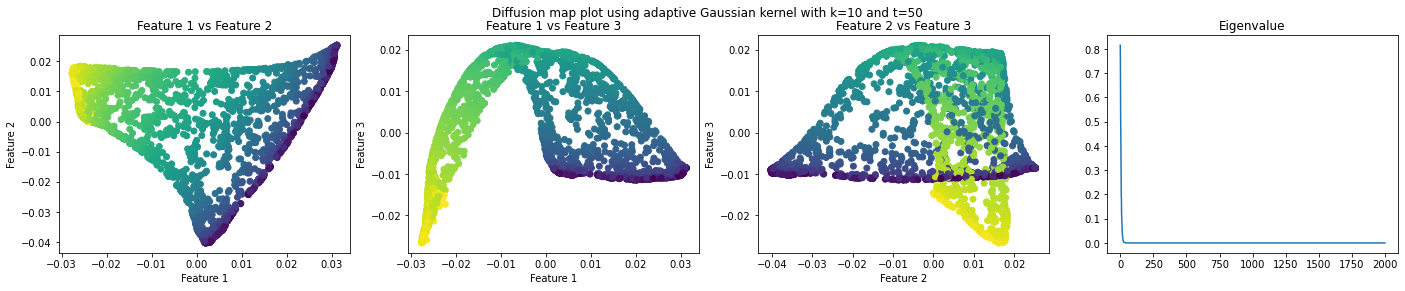

In [19]:
diff_map_k10_t50 = get_diff_map(diff_vec_k10, diff_eig_k10, t=50)
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_k10_t50, diff_eig_k10, swiss_roll_labels, k=10, t=50)
fig.savefig(os.path.join(path_figures,'Section_5_2_t50.pdf'))

## Question 5.3
Answer: 1) Increasing t means increasing the number of random walks in the diffusion map.
2) Diffusion embeddings look similar as t increases.
3) The eigenvalue decreases dramatically when t increases. As only stable eigenvalues will be retained when t increases, the first three features embeddings are stable embeddings for k=10.
4) t=50 is the most informative one as only the stable embeddings are retained.

# Final Thoughts
## Question 5.4
Answer: I will generate 1) multi blobs with proper mapping function and 2) cylindrical ring. Diffusion map might work well with the first one using the adaptive Gaussian kernel function. However, it might be challenging
for diffusion map for the cylindrical ring to track the direction.

# 6 Experiment 2: iPSC Reprogramming Dataset
## 6.1 Visualizing Data with PCA
1. Run PCA on the processed iPSC data set, obtaining the principal components, projections, and singular values.

In [20]:
ipsc_points = load_json_files(os.path.join(path_swiss_roll_root, 'ipsc_data.json'))
ipsc_labels = load_json_files(os.path.join(path_swiss_roll_root, 'ipsc_channel_names.json'))

In [32]:
ipsc_points -= np.mean(ipsc_points, axis=0)
pcs_ipsc, projs_ipsc, sigvalues_ipsc = func_PCA(ipsc_points)
print('Principal components:',pcs_ipsc) # (2000,3)
print('Projections:', projs_ipsc) # (2000,3)
print('Singular values:', sigvalues_ipsc)

Principal components: [[ 0.18496461  0.21722355  0.02457536 ... -0.58865994 -0.040664
   0.04172595]
 [ 0.30792429  0.13155707 -0.16248429 ...  0.42084274 -0.00871618
   0.00341093]
 [ 0.08499823  0.07077137 -0.00502913 ... -0.0249697  -0.01534656
  -0.00739335]
 ...
 [-0.18685509  0.24351598  0.24314915 ... -0.03914631 -0.03485021
   0.00604984]
 [ 0.3179481  -0.03262481  0.03755592 ...  0.00279156  0.02175413
  -0.00201346]
 [ 0.19319652 -0.0206125   0.11445056 ...  0.05234188 -0.03302094
  -0.02915424]]
Projections: [[-6.88462027e+00 -7.48552660e+00 -1.74263063e+00 ...  5.74242799e-01
   3.22092393e-02  5.67450160e-02]
 [-1.81102390e+00  7.22117890e+00  7.85805337e-01 ...  4.92778736e-01
  -4.55320732e-01 -4.25609276e-01]
 [ 2.64685843e+00  6.44377634e+00  2.07468954e-01 ... -2.58433933e-01
  -6.52076614e-02 -1.04492349e-01]
 ...
 [-1.00590669e+01 -5.60557111e+00 -1.14428027e+00 ...  2.35460591e-01
  -2.36924928e-01  4.11230097e-01]
 [ 1.21029247e+00 -5.23457360e-01 -4.16386154e+00 

2. Plot the iPSC data set in two dimensions, using the principal components. You might wish to try a few combinations of the top k = 5 principal components. When plotting the projections, color them using the time steps.

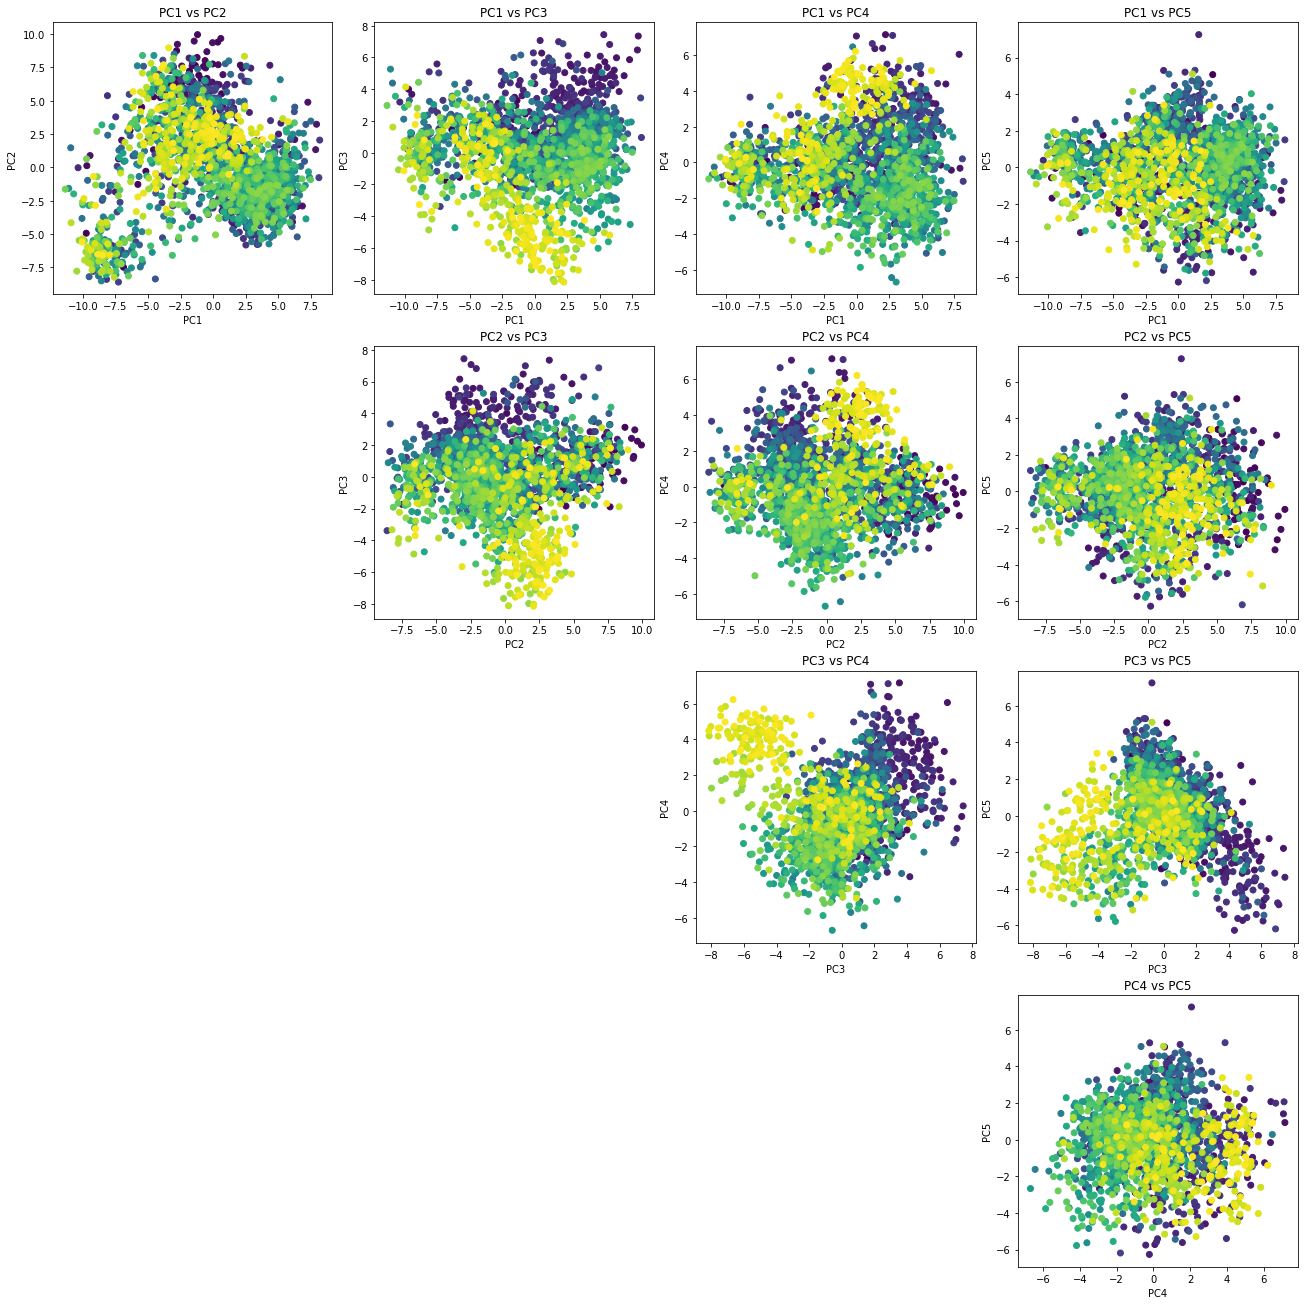

In [35]:
time_steps = np.arange(ipsc_points.shape[0])
fig, axes = plt.subplots(4,4, figsize=(18,18), constrained_layout=True)

axes[0,0].scatter(projs_ipsc[:,0],projs_ipsc[:,1],c=time_steps)
axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
axes[0,0].set_title('PC1 vs PC2')

axes[0,1].scatter(projs_ipsc[:,0],projs_ipsc[:,2],c=time_steps)
axes[0,1].set_xlabel('PC1')
axes[0,1].set_ylabel('PC3')
axes[0,1].set_title('PC1 vs PC3')

axes[0,2].scatter(projs_ipsc[:,0],projs_ipsc[:,3],c=time_steps)
axes[0,2].set_xlabel('PC1')
axes[0,2].set_ylabel('PC4')
axes[0,2].set_title('PC1 vs PC4')

axes[0,3].scatter(projs_ipsc[:,0],projs_ipsc[:,4],c=time_steps)
axes[0,3].set_xlabel('PC1')
axes[0,3].set_ylabel('PC5')
axes[0,3].set_title('PC1 vs PC5')

axes[1,1].scatter(projs_ipsc[:,1],projs_ipsc[:,2],c=time_steps)
axes[1,1].set_xlabel('PC2')
axes[1,1].set_ylabel('PC3')
axes[1,1].set_title('PC2 vs PC3')

axes[1,2].scatter(projs_ipsc[:,1],projs_ipsc[:,3],c=time_steps)
axes[1,2].set_xlabel('PC2')
axes[1,2].set_ylabel('PC4')
axes[1,2].set_title('PC2 vs PC4')

axes[1,3].scatter(projs_ipsc[:,1],projs_ipsc[:,4],c=time_steps)
axes[1,3].set_xlabel('PC2')
axes[1,3].set_ylabel('PC5')
axes[1,3].set_title('PC2 vs PC5')

axes[2,2].scatter(projs_ipsc[:,2],projs_ipsc[:,3],c=time_steps)
axes[2,2].set_xlabel('PC3')
axes[2,2].set_ylabel('PC4')
axes[2,2].set_title('PC3 vs PC4')

axes[2,3].scatter(projs_ipsc[:,2],projs_ipsc[:,4],c=time_steps)
axes[2,3].set_xlabel('PC3')
axes[2,3].set_ylabel('PC5')
axes[2,3].set_title('PC3 vs PC5')

axes[3,3].scatter(projs_ipsc[:,3],projs_ipsc[:,4],c=time_steps)
axes[3,3].set_xlabel('PC4')
axes[3,3].set_ylabel('PC5')
axes[3,3].set_title('PC4 vs PC5')

axes[1,0].axis('off')
axes[2,0].axis('off')
axes[2,1].axis('off')
axes[3,0].axis('off')
axes[3,1].axis('off')
axes[3,2].axis('off')

fig.savefig(os.path.join(path_figures,'Section_6_1.pdf'))
plt.show()

3. Plot the singular values in whatever way you see fit.

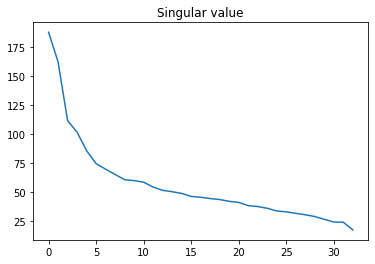

In [23]:
plt.plot(np.arange(sigvalues_ipsc.shape[0]),sigvalues_ipsc)
plt.title('Singular value')
plt.savefig(os.path.join(path_figures,'Section_6_1_sigvalue.pdf'))
plt.show()

In [37]:
print('Top 3 channels in the first principal direction are:', [ipsc_labels[i] for i in np.abs(pcs_ipsc[:,0]).argsort()[-3:][::-1]])
print('Top 3 channels in the second principal direction are:', [ipsc_labels[i] for i in np.abs(pcs_ipsc[:,1]).argsort()[-3:][::-1]])

Top 3 channels in the first principal direction are: ['oct4', 'ki67', 'klf4']
Top 3 channels in the second principal direction are: ['bcatenin', 'ikba', 'thy1']


## Question 6.1
Answer: The PCA visualization looks not quite informative. They capture some information of the time progression as we can see some clusters forming in the above figure. However, the clusters are not clearly separated.
The intrinsic dimensionality given by PCA is 2. The top 3 channels in the first principal direction are: ['oct4', 'ki67', 'klf4']. The top 3 channels in the second principal direction are: ['bcatenin', 'ikba', 'thy1'].

## Question 6.2 Visualizing Data with Diffusion Maps
1. Construct the affinity matrix of the iPSC data set using euclidean distance and adaptive k-nearest neighbors Gaussian kernel with k = 2 and diffusion parameter t = 1.

In [38]:
diff_map_ipsc_k2, diff_vec_ipsc_k2, diff_eig_ipsc_k2 = func_DiffuseMap(ipsc_points, kernel_type='adaptive', k=2, t=1)

2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.
3. Create three-dimensional scatter plot of the diffusion mapping using the first three coordinates for plotting. Color the points with their corresponding timepoint values.
4. Plot the associated eigenvalues of the Markov matrix.

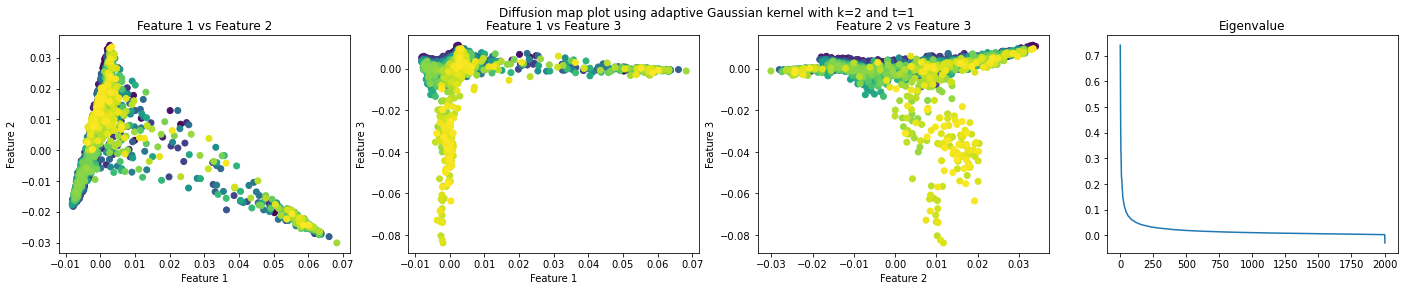

In [40]:
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_ipsc_k2, diff_eig_ipsc_k2, time_steps, k=2, t=1)
fig.savefig(os.path.join(path_figures,'Section_6_2_k2_t1.pdf'))

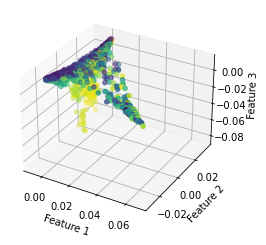

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(diff_map_ipsc_k2[:,0], diff_map_ipsc_k2[:,1], diff_map_ipsc_k2[:,2], c=time_steps)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
fig.savefig(os.path.join(path_figures,'Section_6_2_diffmap.pdf'))
plt.show()

5. Compute the top 5 channels that have the highest absolute correlation with the first, second, and third diffusion components.

In [51]:
from scipy.stats import pearsonr
def func_computeIpscCorrelation(ipsc_points, diff_component):
    corr_list = []
    numOfFeature = ipsc_points.shape[1]
    for i in range(numOfFeature):
        corr_list.append(pearsonr(ipsc_points[:,i], diff_component)[0])
    return np.array(corr_list)

corr_diff1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2[:,0])
corr_diff2 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2[:,1])
corr_diff3 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2[:,2])

print('Top 5 channels that have highest absolute correlation with the first diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff1).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the second diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff2).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the third diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff3).argsort()[-5:][::-1]])

Top 5 channels that have highest absolute correlation with the first diffusion component are: ['h3k9ac', 'prb', 'pplk1', 'pstat3-727', 'pampk']
Top 5 channels that have highest absolute correlation with the second diffusion component are: ['bcatenin', 'cd140a', 'ikba', 'mefsk4', 'oct4']
Top 5 channels that have highest absolute correlation with the third diffusion component are: ['lin28', 'ssea1', 'epcam', 'cd44', 'gfp']


## Question 6.2
Answer: The diffusion map seems to capture the progression of the data. From the 2D scatter plot, we can see some clusters are forming with some line progression. The intrinsic dimensionality seems to be 3 as the 3D
plot tracks the time progression well. From the correlation calculation, we can see that some top channels that correlates with the diffusion component include ['oct4', 'line28', 'prb'], which
represents ['pluripotency or stem-ness', 'differentiation', 'cell-cycle'], respectively. As PCA uses linear combination, it does not captures time progression well although with some clusters forming.

## 6.3 Changing Parameters
1. Try two different values of diffusion parameter t and visualize the embeddings and the eigenvalues.
2. Try two different values of k for the adaptive kernel and visualize the embeddings and the eigenvalues.
3. For every choice of parameters above, compute the top 5 channels that have the highest absolute correlation with the first, second, and third diffusion components.

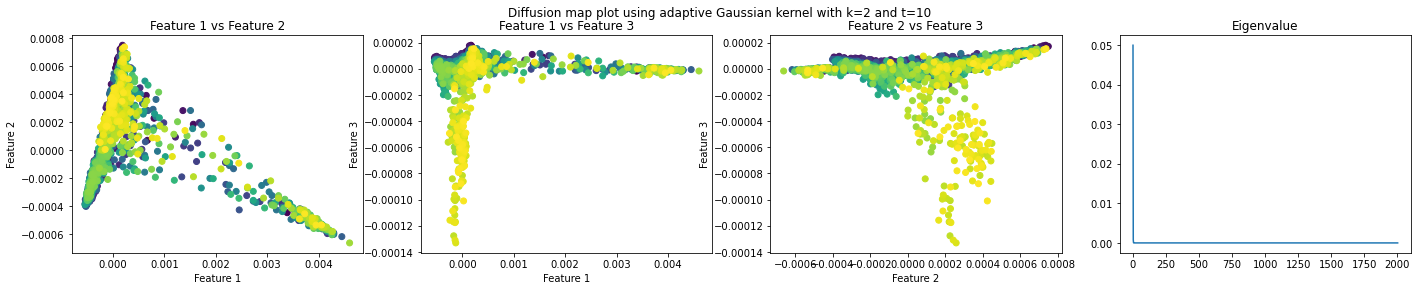

Top 5 channels that have highest absolute correlation with the first diffusion component are: ['h3k9ac', 'prb', 'pplk1', 'pstat3-727', 'pampk']
Top 5 channels that have highest absolute correlation with the second diffusion component are: ['bcatenin', 'cd140a', 'ikba', 'mefsk4', 'oct4']
Top 5 channels that have highest absolute correlation with the third diffusion component are: ['lin28', 'ssea1', 'epcam', 'cd44', 'gfp']


In [56]:
diff_map_ipsc_k2_t10 = get_diff_map(diff_vec_ipsc_k2, diff_eig_ipsc_k2, t=10)
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_ipsc_k2_t10, diff_eig_ipsc_k2, time_steps, k=2, t=10)
fig.savefig(os.path.join(path_figures,'Section_6_3_k2_t10.pdf'))

corr_diff1_k2_t10 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t10[:,0])
corr_diff2_k2_t10 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t10[:,1])
corr_diff3_k2_t10 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t10[:,2])

print('Top 5 channels that have highest absolute correlation with the first diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff1_k2_t10).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the second diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff2_k2_t10).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the third diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff3_k2_t10).argsort()[-5:][::-1]])

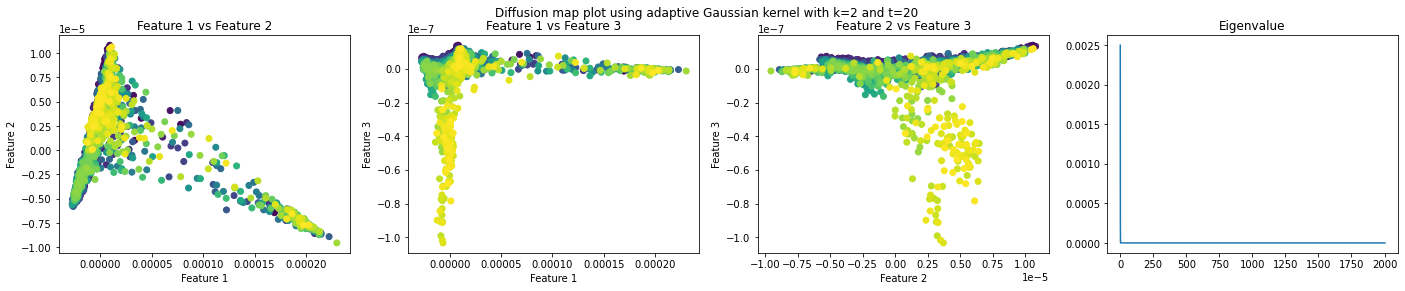

Top 5 channels that have highest absolute correlation with the first diffusion component are: ['h3k9ac', 'prb', 'pplk1', 'pstat3-727', 'pampk']
Top 5 channels that have highest absolute correlation with the second diffusion component are: ['bcatenin', 'cd140a', 'ikba', 'mefsk4', 'oct4']
Top 5 channels that have highest absolute correlation with the third diffusion component are: ['lin28', 'ssea1', 'epcam', 'cd44', 'gfp']


In [57]:
diff_map_ipsc_k2_t20 = get_diff_map(diff_vec_ipsc_k2, diff_eig_ipsc_k2, t=20)
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_ipsc_k2_t20, diff_eig_ipsc_k2, time_steps, k=2, t=20)
fig.savefig(os.path.join(path_figures,'Section_6_2_k2_t20.pdf'))

corr_diff1_k2_t20 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t20[:,0])
corr_diff2_k2_t20 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t20[:,1])
corr_diff3_k2_t20 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k2_t20[:,2])

print('Top 5 channels that have highest absolute correlation with the first diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff1_k2_t20).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the second diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff2_k2_t20).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the third diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff3_k2_t20).argsort()[-5:][::-1]])

In [54]:
diff_map_ipsc_k5_t1, diff_vec_ipsc_k5_t1, diff_eig_ipsc_k5_t1 = func_DiffuseMap(ipsc_points, kernel_type='adaptive', k=5, t=1)

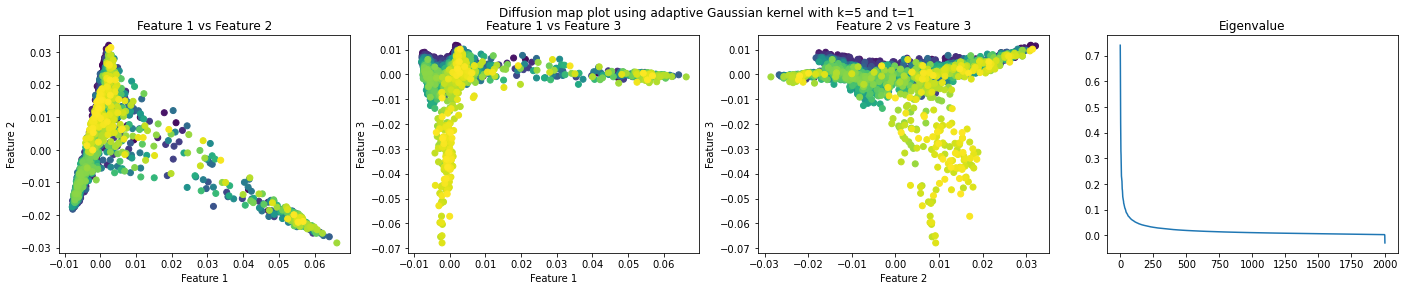

Top 5 channels that have highest absolute correlation with the first diffusion component are: ['h3k9ac', 'prb', 'pplk1', 'pstat3-727', 'pampk']
Top 5 channels that have highest absolute correlation with the second diffusion component are: ['bcatenin', 'cd140a', 'ikba', 'mefsk4', 'oct4']
Top 5 channels that have highest absolute correlation with the third diffusion component are: ['lin28', 'epcam', 'ssea1', 'cd44', 'gfp']


In [59]:
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_ipsc_k5_t1, diff_eig_ipsc_k2, time_steps, k=5, t=1)
fig.savefig(os.path.join(path_figures,'Section_6_2_k5_t1.pdf'))

corr_diff1_k5_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k5_t1[:,0])
corr_diff2_k5_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k5_t1[:,1])
corr_diff3_k5_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k5_t1[:,2])

print('Top 5 channels that have highest absolute correlation with the first diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff1_k5_t1).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the second diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff2_k5_t1).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the third diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff3_k5_t1).argsort()[-5:][::-1]])

In [58]:
diff_map_ipsc_k10_t1, diff_vec_ipsc_k10_t1, diff_eig_ipsc_k10_t1 = func_DiffuseMap(ipsc_points, kernel_type='adaptive', k=10, t=1)

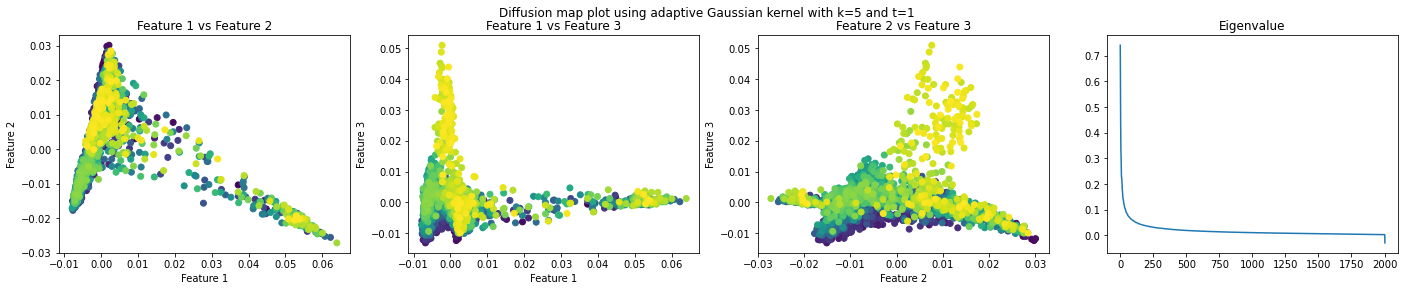

Top 5 channels that have highest absolute correlation with the first diffusion component are: ['h3k9ac', 'prb', 'pplk1', 'pstat3-727', 'pampk']
Top 5 channels that have highest absolute correlation with the second diffusion component are: ['bcatenin', 'cd140a', 'ikba', 'mefsk4', 'oct4']
Top 5 channels that have highest absolute correlation with the third diffusion component are: ['lin28', 'epcam', 'ssea1', 'sox2', 'thy1']


In [60]:
fig = func_plotDiffuseMapEigenValueWithTitle(diff_map_ipsc_k10_t1, diff_eig_ipsc_k2, time_steps, k=5, t=1)
fig.savefig(os.path.join(path_figures,'Section_6_2_k10_t1.pdf'))

corr_diff1_k10_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k10_t1[:,0])
corr_diff2_k10_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k10_t1[:,1])
corr_diff3_k10_t1 = func_computeIpscCorrelation(ipsc_points, diff_map_ipsc_k10_t1[:,2])

print('Top 5 channels that have highest absolute correlation with the first diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff1_k10_t1).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the second diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff2_k10_t1).argsort()[-5:][::-1]])
print('Top 5 channels that have highest absolute correlation with the third diffusion component are:', [ipsc_labels[i] for i in np.abs(corr_diff3_k10_t1).argsort()[-5:][::-1]])

## Question 6.3
Answer: 1) The parameter t does not affect the embedding from the above visualizations. The eigenvalues change dramatically as t increases. 
2) The k does not affect the embeddings dramatically.
3) The previously observed trends don't change dramatically.
4) The top 3 correlated channels don't change with k but the fourth and fifth channel change a little with k=5 and k=10. 
5) The t, k are important hyperparameters that will affect the single-cell resolution analaysis.